<a href="https://colab.research.google.com/github/tigerak/1st_practice/blob/main/%EC%84%A0%ED%98%95%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀


## 캘리포니아 주택 데이터

In [2]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the 

In [39]:
import pandas as pd
 
california_df = pd.DataFrame(california.data, columns = california.feature_names)
california_df['Target'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


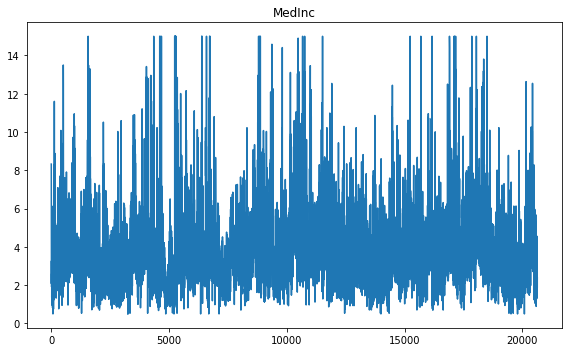

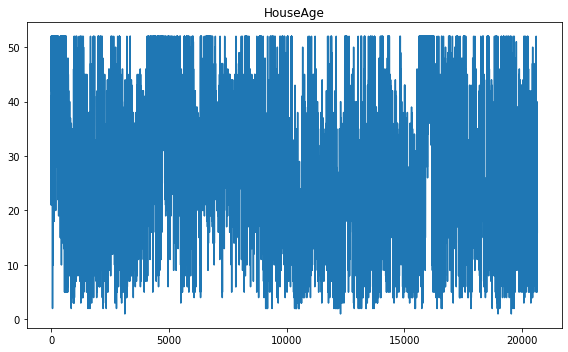

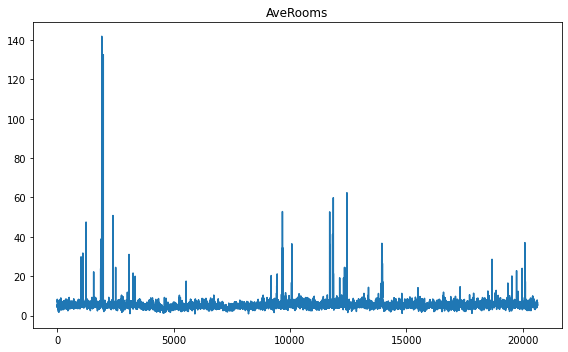

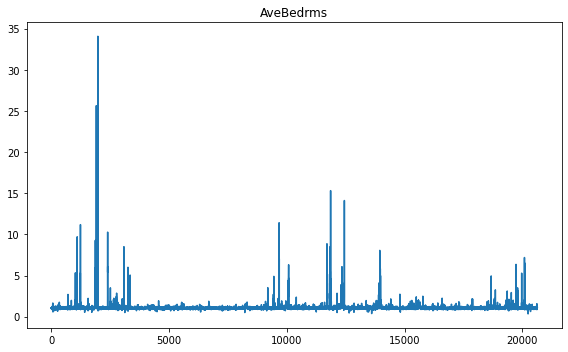

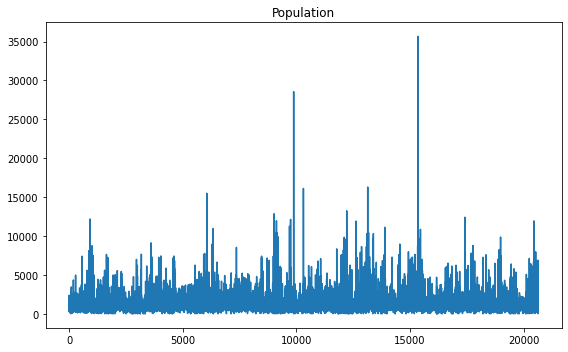

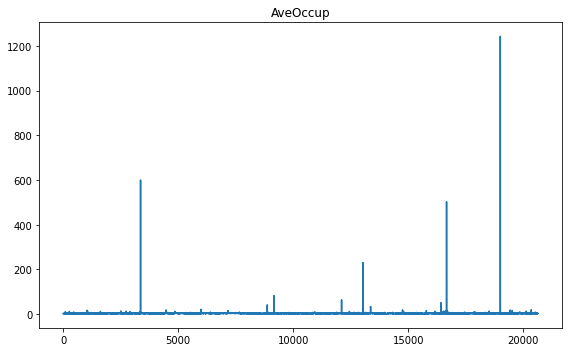

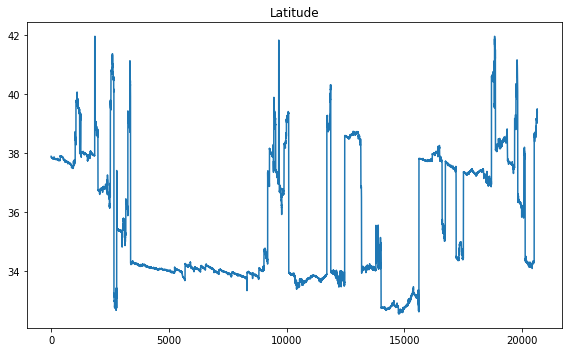

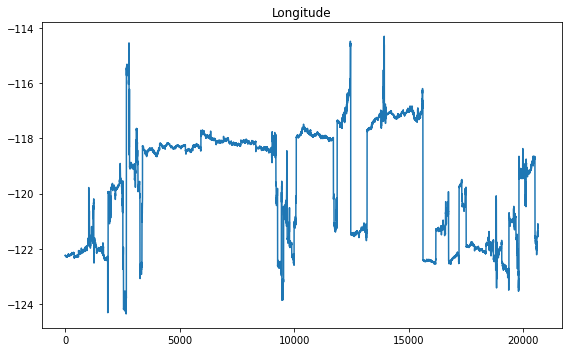

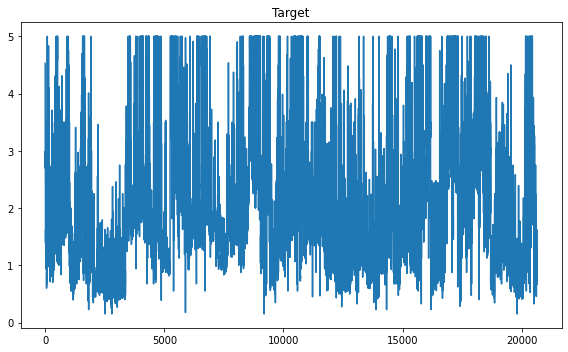

In [9]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8, 5))
    plt.plot(california_df[col])
    plt.title(col)
    plt.tight_layout()

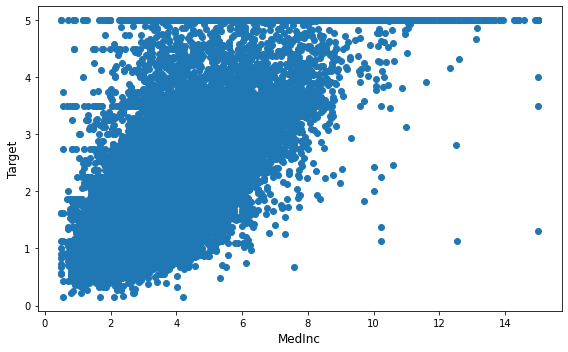

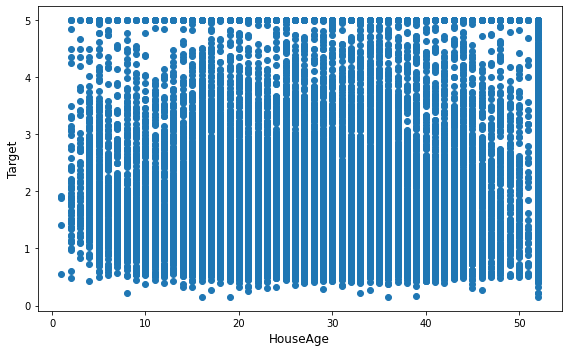

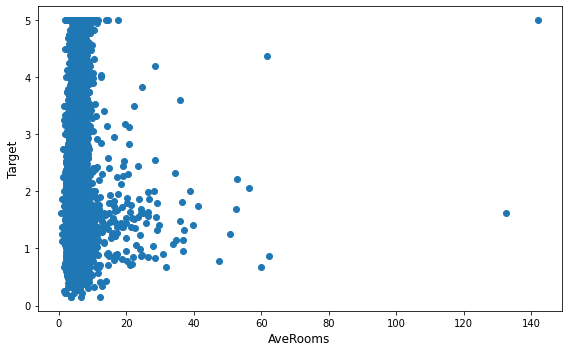

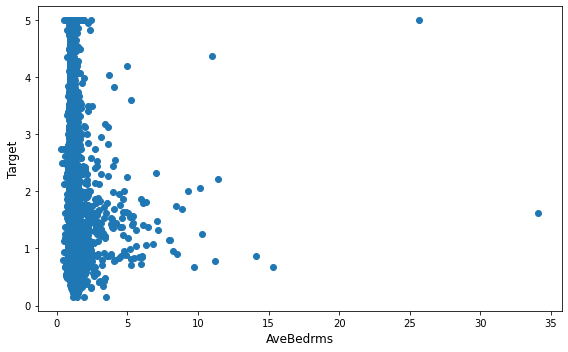

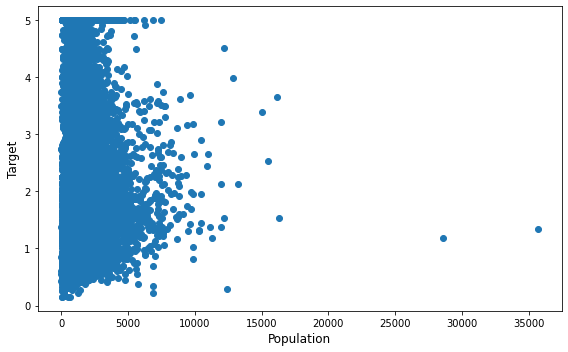

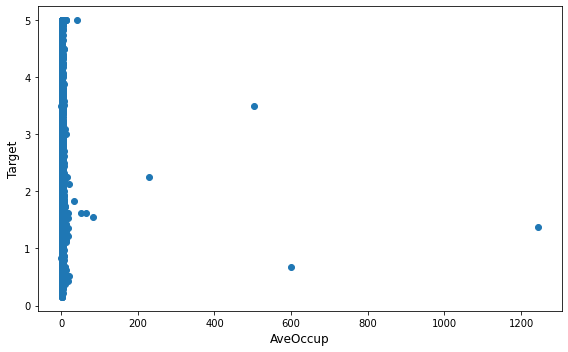

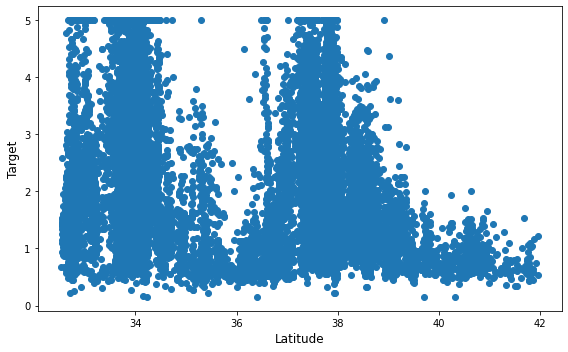

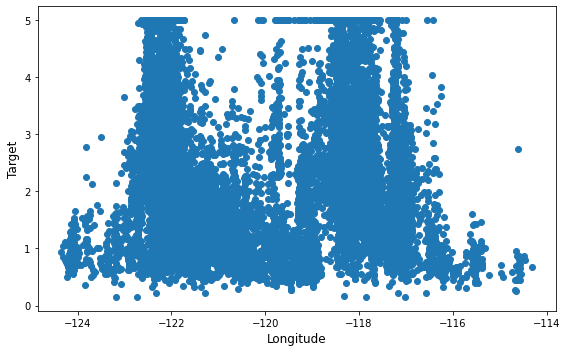

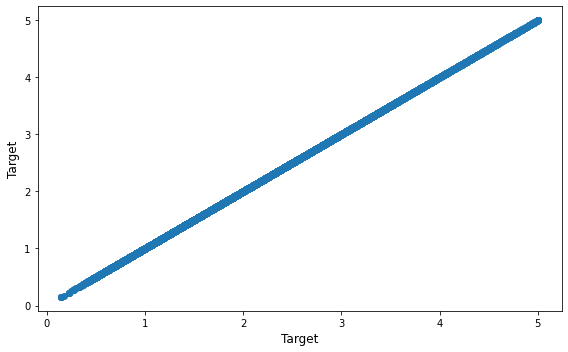

In [12]:
for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8, 5))
    plt.scatter(california_df[col], california_df['Target'],)
    plt.ylabel('Target', size=12)
    plt.xlabel(col, size=12)
    plt.tight_layout()

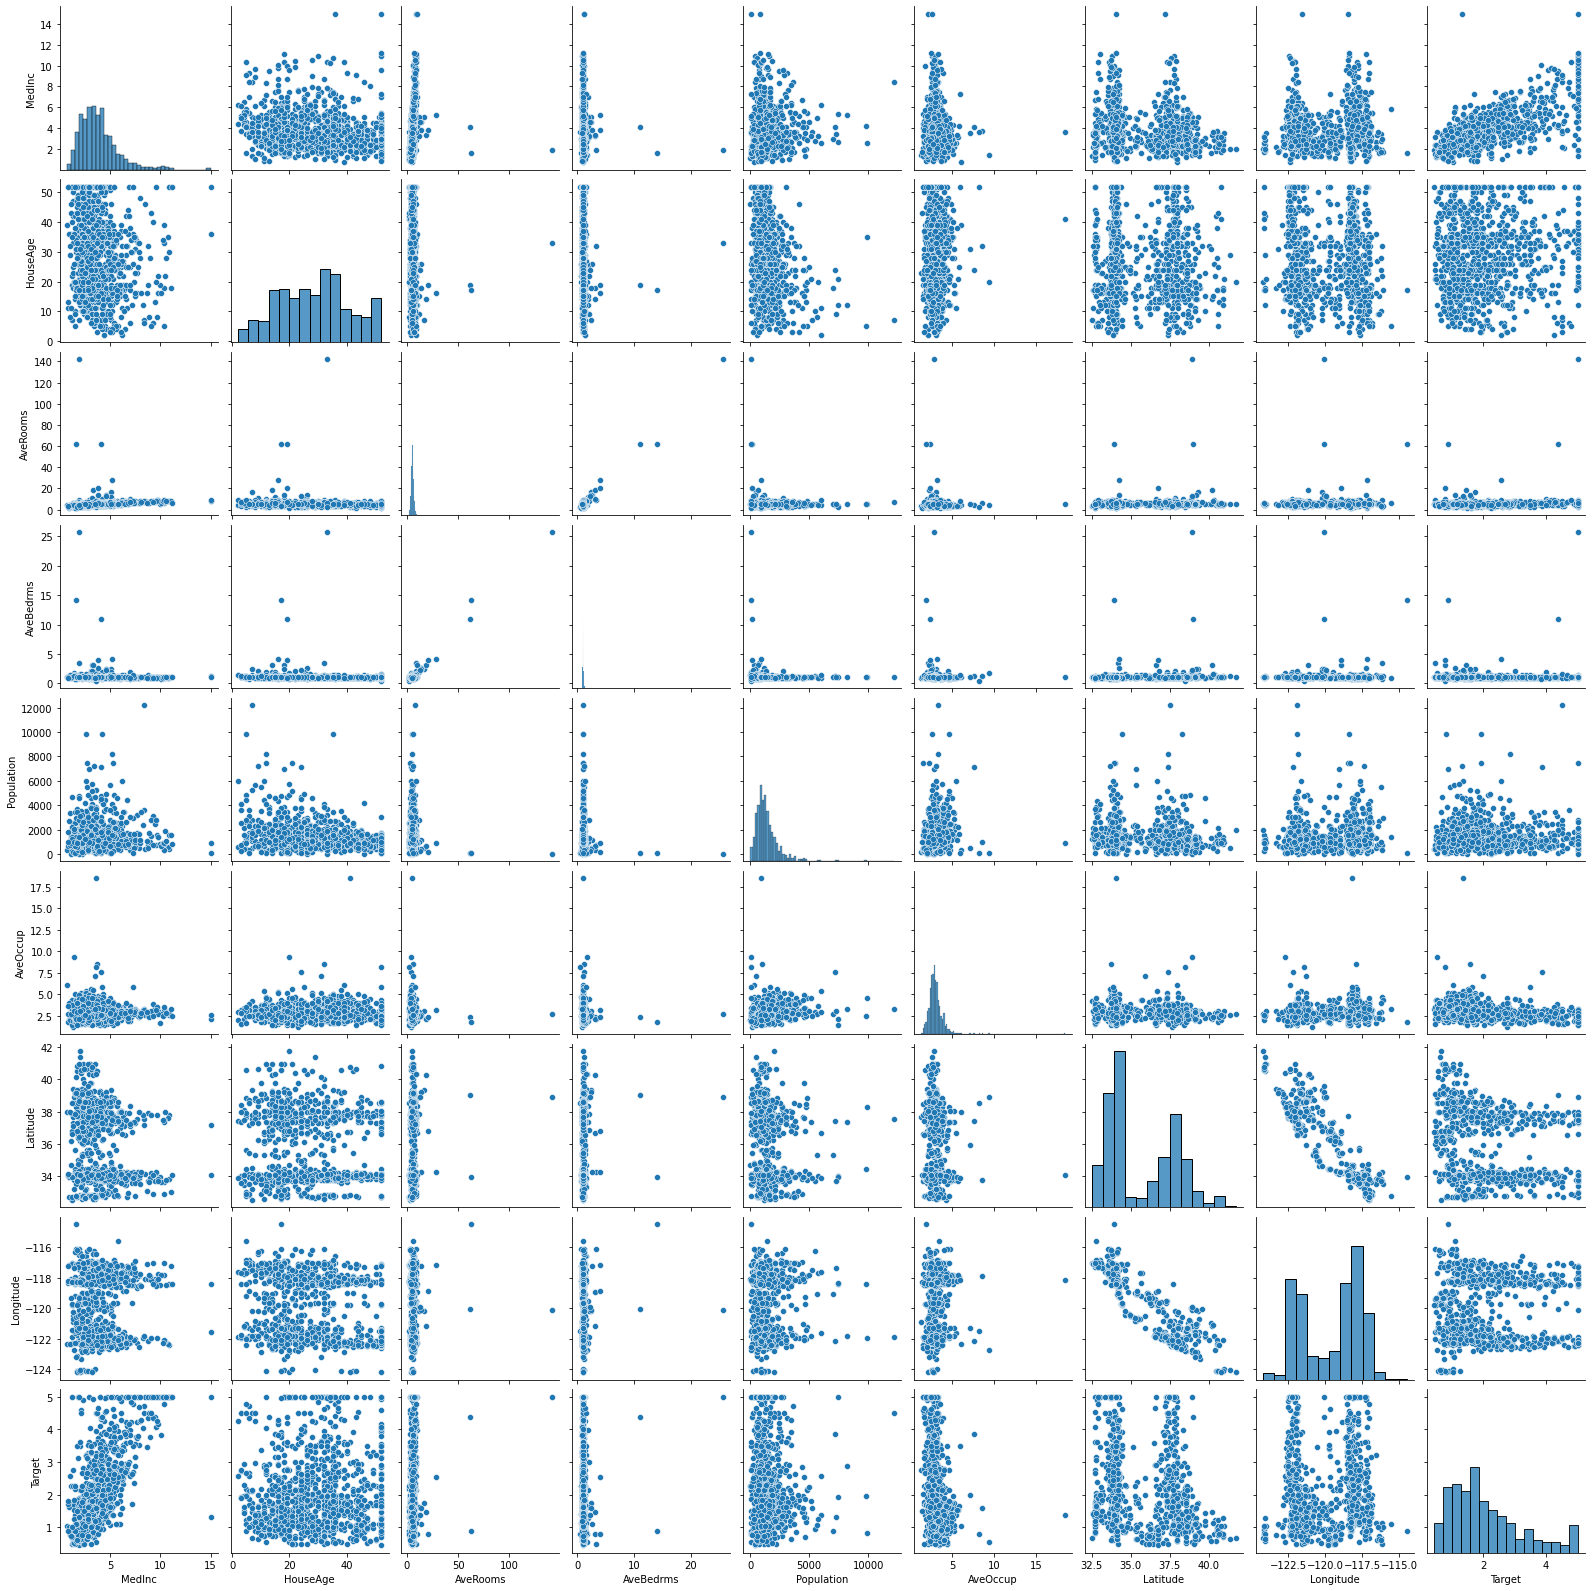

In [13]:
import seaborn as sns

sns.pairplot(california_df.sample(1000));

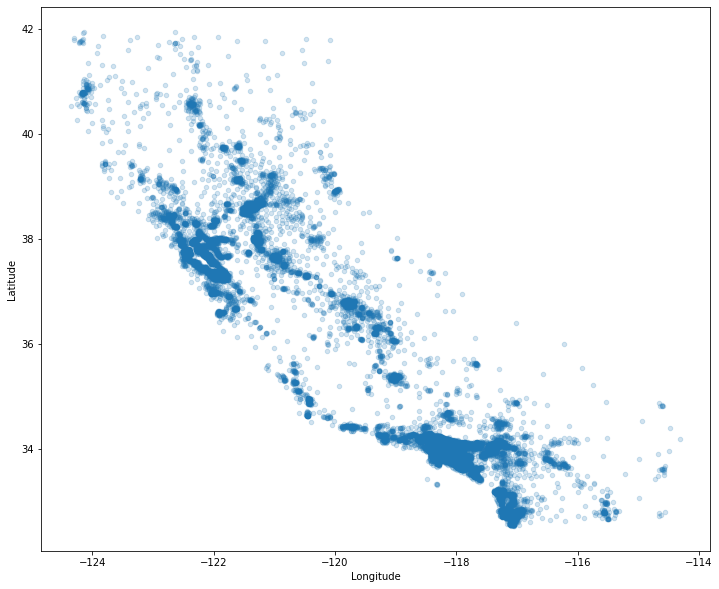

In [15]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12,10));

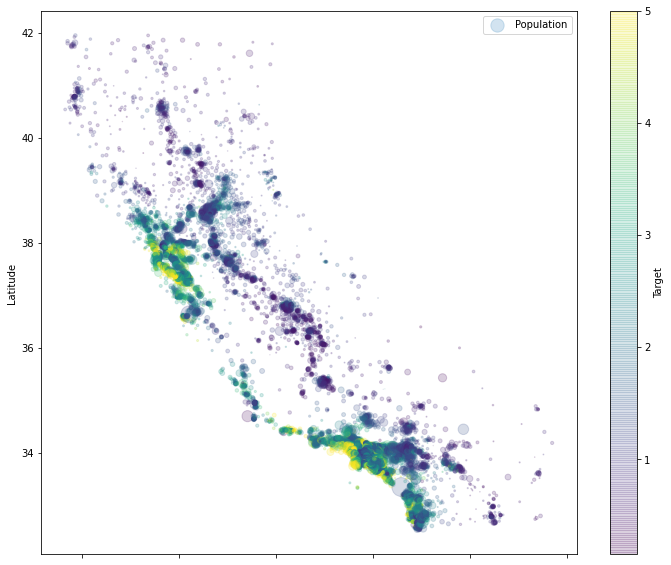

In [20]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, \
                   s=california_df['Population']/100, label='Population', figsize=(12,10), \
                   c='Target', cmap=plt.get_cmap('viridis'), colorbar=True);

## 캘리포니아 주택 가격에 대한 선형회귀

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression(normalize=True)

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, \
                                                    test_size=0.2)
model.fit(X_train, y_train)
print('Train Scores : {}'.format(model.score(X_train, y_train)))
print('Test Scores : {}'.format(model.score(X_test, y_test)))

scores = cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')
print('NMSE mean : {}'.format(scores.mean()))
print('NMSE std : {}'.format(scores.std()))

r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring='r2')
print('R2 Score mean : {}'.format(r2_scores.mean()))

Train Scores : 0.6024555764095143
Test Scores : 0.6195675139673241
NMSE mean : -0.5509524296956642
NMSE std : 0.19288582953865108
R2 Score mean : 0.5110068610523768


In [46]:
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c) + ' * x' + str(i))

y = -37.28195612981432 
0.4308663112008043 * x0
0.009374787156392915 * x1
-0.09159466056431896 * x2
0.5719689347510357 * x3
-8.49115140682812e-06 * x4
-0.0033825374152711874 * x5
-0.4277934573561924 * x6
-0.4395323893147286 * x7


In [54]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE : {}'.format(rmse))
print('R2 Score : {}'.format(r2))

TypeError: ignored

In [48]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE : {}'.format(rmse))
print('R2 Score : {}'.format(r2))

TypeError: ignored